In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,7)
sns.set(rc={'figure.figsize':(20,10)})

In [109]:
survey_data = pd.read_excel('DACC_Hackathon_Media_Habit_Survey.xlsx', sheet_name ='Raw Responses')

In [110]:
survey_data.head()

ID  freqTV  hoursTV  v_16  v_17  ...  v_309  v_310  v_311  v_312  v_333
0  101011101       6      7.0     6   2.0  ...      0      0      0    NaN    1.0
1  105017101       7      7.0     7   NaN  ...      0      0      0    NaN    1.0
2  105021106       1      3.5     1   5.0  ...      0      0      0    NaN    1.0
3  105044101       1      4.0     1   6.0  ...      0      0      0    NaN    1.0
4  105046101       2      3.5     2   3.0  ...      0      1      0    NaN    0.0

[5 rows x 263 columns]

In [111]:
survey_data.describe()

ID       freqTV  ...        v_311        v_333
count  1.891000e+03  1891.000000  ...  1891.000000  1552.000000
mean   5.079220e+08     1.953464  ...     0.048123     0.412371
std    2.851614e+08     1.730508  ...     0.214082     0.492420
min    1.010111e+08     1.000000  ...     0.000000     0.000000
25%    2.241206e+08     1.000000  ...     0.000000     0.000000
50%    4.420581e+08     1.000000  ...     0.000000     0.000000
75%    8.015492e+08     2.000000  ...     0.000000     1.000000
max    8.022200e+08     7.000000  ...     1.000000     1.000000

[8 rows x 254 columns]

#**Question 1**

##**Frequency of TV Watching (1a - 1c: v_16 - v_18)**

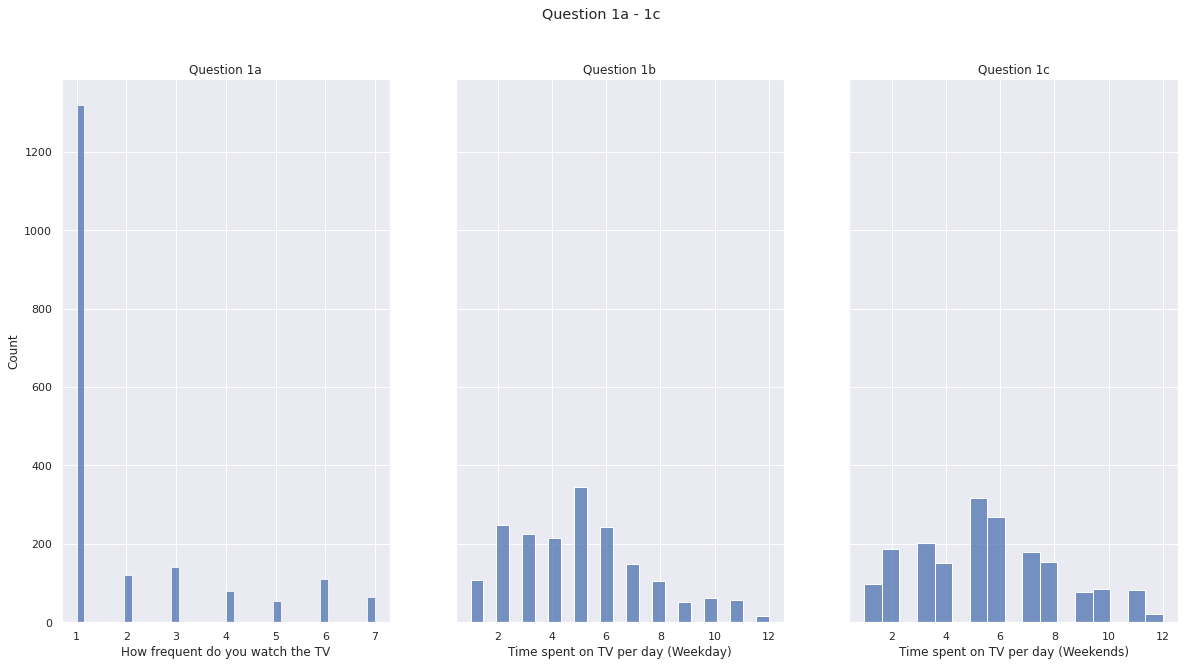

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Question 1a - 1c')

sns.histplot(ax=ax[0],data = survey_data, x='v_16');
ax[0].set_title('Question 1a')
ax[0].set_xlabel('How frequent do you watch the TV')

sns.histplot(ax=ax[1], data=survey_data, x='v_17');
ax[1].set_title('Question 1b')
ax[1].set_xlabel('Time spent on TV per day (Weekday)')

sns.histplot(ax=ax[2], data=survey_data, x='v_18');
ax[2].set_title('Question 1c')
ax[2].set_xlabel('Time spent on TV per day (Weekends)')

plt.show()

##**Time spent on TV based on day-parts (v_19 - v_48)**

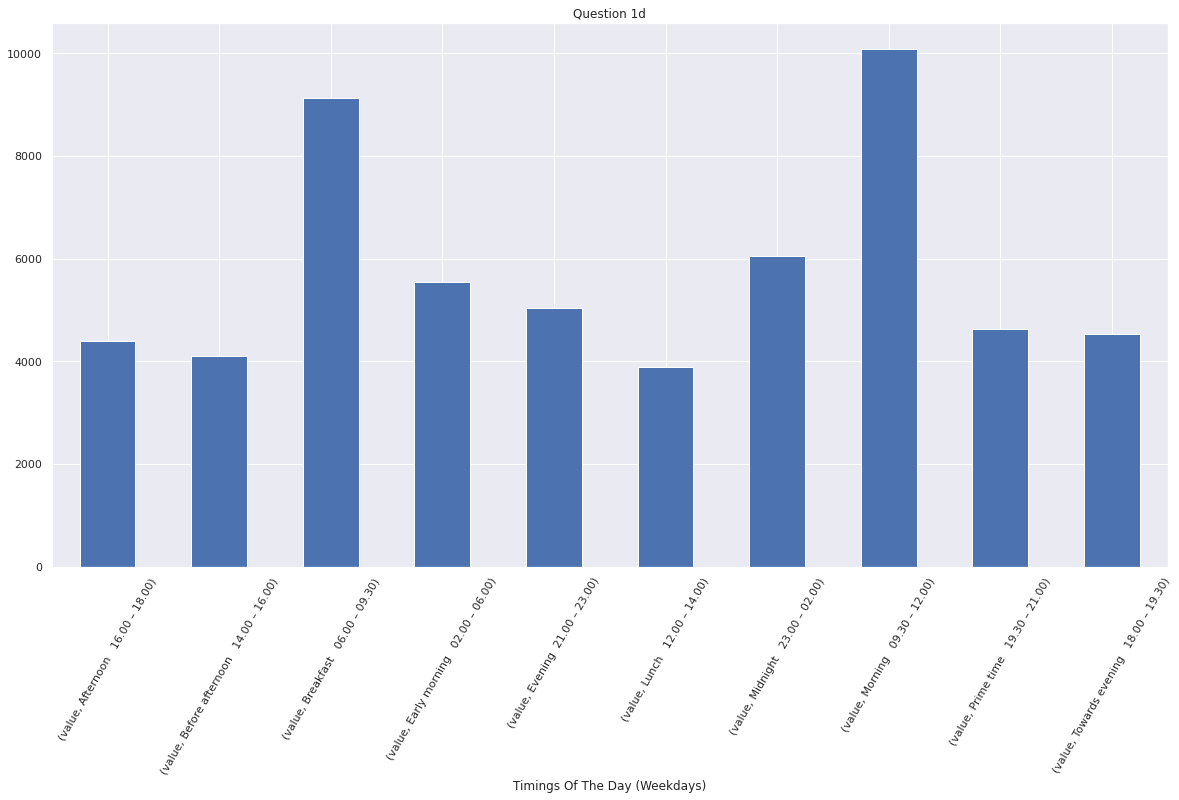

In [113]:
weekdaysWatch = survey_data.melt(id_vars=['ID'], value_vars= survey_data.columns[4:14])

timings= []

counter = 0
f = open("timings", "r")
for line in f:
  timings.append(line.rstrip())

weekdaysWatch.replace(survey_data.columns[4:14], timings, inplace=True)
weekdaysWatch.drop(columns=['ID'], inplace=True)

weekdaysWatch.groupby(['variable']).sum().unstack().plot(kind='bar');
plt.title('Question 1d')
plt.xlabel('Timings Of The Day (Weekdays)')
#ax[1].set_xticklabels(['Others', 'PC/Laptop','Smartphone','Tablet Computer'])
plt.xticks(rotation=60);

###**We can see that most people watch the TV during the Prime Time/ Evening Time on Weekdays.**


In [114]:
satWatch = survey_data.melt(id_vars=['ID'], value_vars= survey_data.columns[14:24])
sunWatch = survey_data.melt(id_vars=['ID'], value_vars= survey_data.columns[24:34])

timings= []

counter = 0
f = open("timings", "r")
for line in f:
  timings.append(line.rstrip())

satWatch.replace(survey_data.columns[14:24], timings, inplace=True)
satWatch.drop(columns=['ID'], inplace=True)

sunWatch.replace(survey_data.columns[24:34], timings, inplace=True)
sunWatch.drop(columns=['ID'], inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Question 1d')

satWatch.groupby(['variable']).sum().unstack().plot(kind='bar', ax=ax[0]);
ax[0].set_title('Question 1d')
ax[0].set_xlabel('Timings Of The Day (Saturday)')
plt.xticks(rotation=60)

sunWatch.groupby(['variable']).sum().unstack().plot(kind='bar', ax=ax[1]);
ax[1].set_title('Question 1d')
ax[1].set_xlabel('Timings Of The Day (Sunday)')

Text(0.5, 0, 'Timings Of The Day (Sunday)')

###**We can see that even on Weekends, majority of the citizens watch TV during the Prime Time and Evening.**

##**Television Platforms (1e: v_49 - v_55)**

In [115]:
temp = survey_data.melt(id_vars=['ID'], value_vars=['v_49','v_50','v_51','v_52','v_53','v_54'])

In [116]:
temp.replace(['v_49','v_50','v_51','v_52','v_53','v_54'],['FTA','Astro','Njoi','Hypp Tv','Internet TV','Others'], inplace=True)

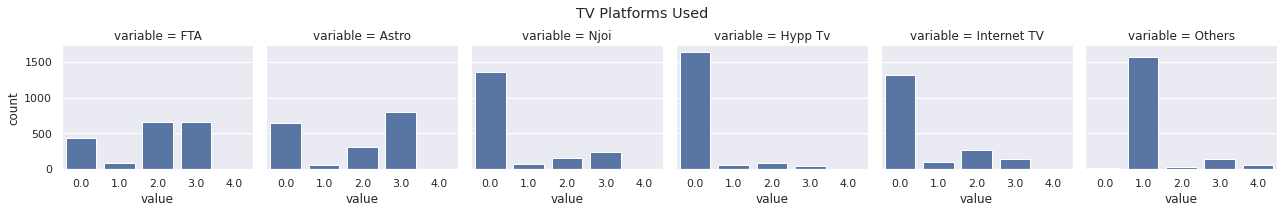

In [117]:
g = sns.FacetGrid(data=temp, col="variable");
g.map_dataframe(sns.countplot, x='value');
g.fig.subplots_adjust(top=0.8);
g.fig.suptitle('TV Platforms Used');

In [118]:
others = survey_data[['ID', 'v_55']]
others.dropna(inplace=True)
others['v_55'] = others['v_55'].str.lower()

sns.countplot(data=others, x='v_55');
plt.title('Other Types of TV Platforms Used')
plt.xlabel('TV Platform (Others)')
plt.xticks(rotation=90);

###**Highest watch count is on Youtube.**

##**Time Spent on Each Channel**

In [119]:
survey_data.columns[43:81]

Index(['v_83', 'v_84', 'v_85', 'v_86', 'v_82', 'v_70', 'v_71', 'v_72', 'v_73',
       'v_74', 'v_88', 'v_89', 'v_90', 'v_76', 'v_77', 'v_78', 'v_79', 'v_80',
       'v_92', 'v_93', 'v_94', 'v_96', 'v_97', 'v_98', 'v_100', 'v_101',
       'v_102', 'v_104', 'v_105', 'v_106', 'v_62', 'v_63', 'v_64', 'v_65',
       'v_66', 'v_67', 'v_68', 'v_108'],
      dtype='object')

In [120]:
timeSpentOnChannel = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[41:79])

In [121]:
titles= []

counter = 0
f = open("titles", "r")
for line in f:
  if counter == 0:
    titles.append(line.rstrip())
    counter += 1
    continue
  counter += 1
  if counter == 5:
    counter = 0


In [122]:
timeSpentOnChannel.replace(['v_83', 'v_84', 'v_85', 'v_86', 'v_82', 'v_70', 'v_71', 'v_72', 'v_73',
       'v_74', 'v_88', 'v_89', 'v_90', 'v_76', 'v_77', 'v_78', 'v_79', 'v_80',
       'v_92', 'v_93', 'v_94', 'v_96', 'v_97', 'v_98', 'v_100', 'v_101',
       'v_102', 'v_104', 'v_105', 'v_106', 'v_62', 'v_63', 'v_64', 'v_65',
       'v_66', 'v_67', 'v_68', 'v_108'], titles)

ID   variable value
0      101011101       v_54     3
1      105017101       v_54   NaN
2      105021106       v_54     1
3      105044101       v_54     1
4      105046101       v_54     3
...          ...        ...   ...
71853  802188101  8TV (148)     1
71854  802188801  8TV (148)     1
71855  802188901  8TV (148)     1
71856  802189701  8TV (148)     3
71857  802220001  8TV (148)     3

[71858 rows x 3 columns]

###**Cleaning Titles**

In [123]:
cleaned_titles = []
for title in titles:
  cleaned_title = title.split('(')[0]
  cleaned_titles.append(cleaned_title.strip())
  

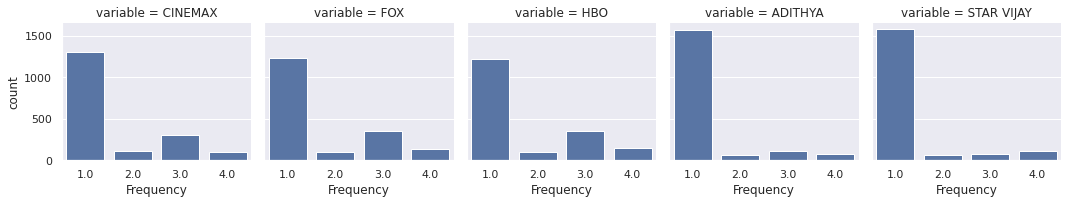

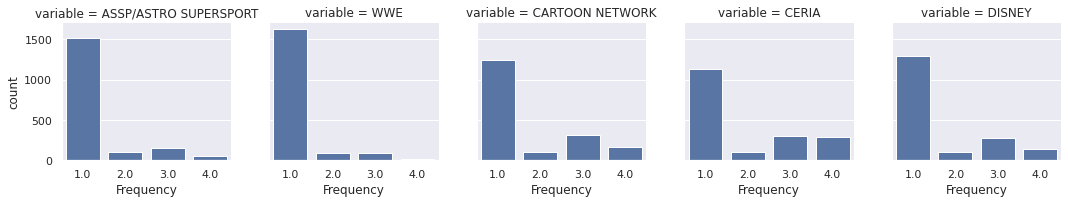

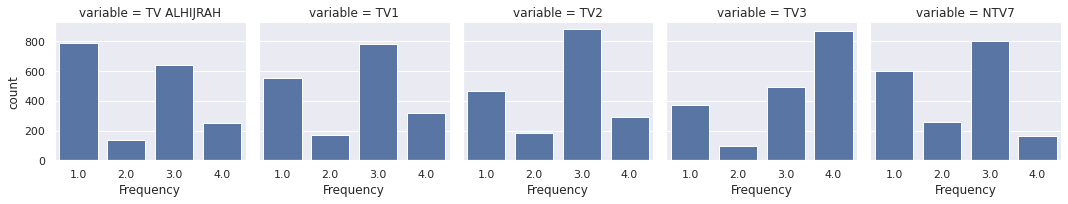

In [124]:
counter = 0
min_i = 43
max_i = 81
len_titles = len(cleaned_titles)

for i in range(min_i, max_i, 5):
  if i + 5 > max_i:
    cols = survey_data.columns[i:max_i]
    facettitles = cleaned_titles[counter: len_titles]
    timeSpentOnChannel = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[i:max_i])
    temp = timeSpentOnChannel.replace(cols, facettitles)
    g = sns.FacetGrid(data=temp, col="variable");
    g.map_dataframe(sns.countplot, x='value');
    break

  cols = survey_data.columns[i:i+5]
  facettitles = cleaned_titles[counter: counter + 5]
  counter += 5
  timeSpentOnChannel = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[i:i+5])
  temp = timeSpentOnChannel.replace(cols, facettitles)
  g = sns.FacetGrid(data=temp, col="variable");
  g.map_dataframe(sns.countplot, x='value');
  g.set_xlabels('Frequency');

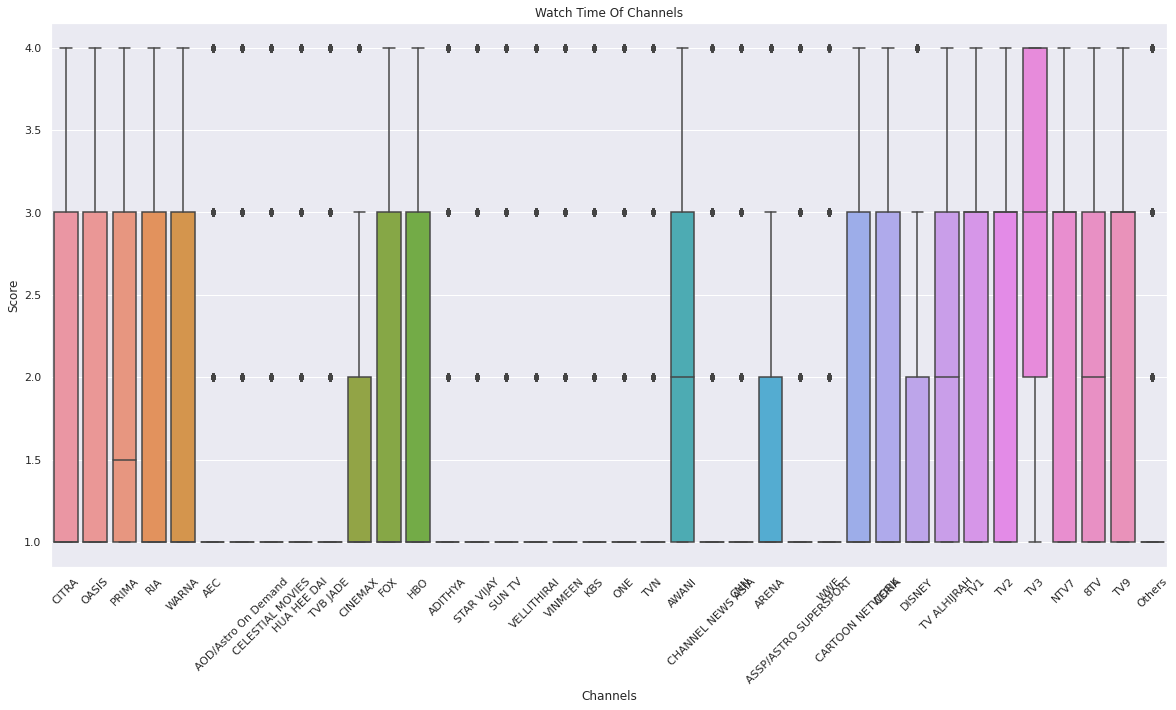

In [125]:
timeSpentOnChannel = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[43:81])
tSC = timeSpentOnChannel.replace(['v_83', 'v_84', 'v_85', 'v_86', 'v_82', 'v_70', 'v_71', 'v_72', 'v_73',
       'v_74', 'v_88', 'v_89', 'v_90', 'v_76', 'v_77', 'v_78', 'v_79', 'v_80',
       'v_92', 'v_93', 'v_94', 'v_96', 'v_97', 'v_98', 'v_100', 'v_101',
       'v_102', 'v_104', 'v_105', 'v_106', 'v_62', 'v_63', 'v_64', 'v_65',
       'v_66', 'v_67', 'v_68', 'v_108'], cleaned_titles)
sns.boxplot(data=tSC,x='variable', y='value');
plt.title('Watch Time Of Channels')
plt.xlabel('Channels')
plt.ylabel('Score')
plt.xticks(rotation=45);

###**We can see that TV3 has the highest average watch time as compared to the other channels.**

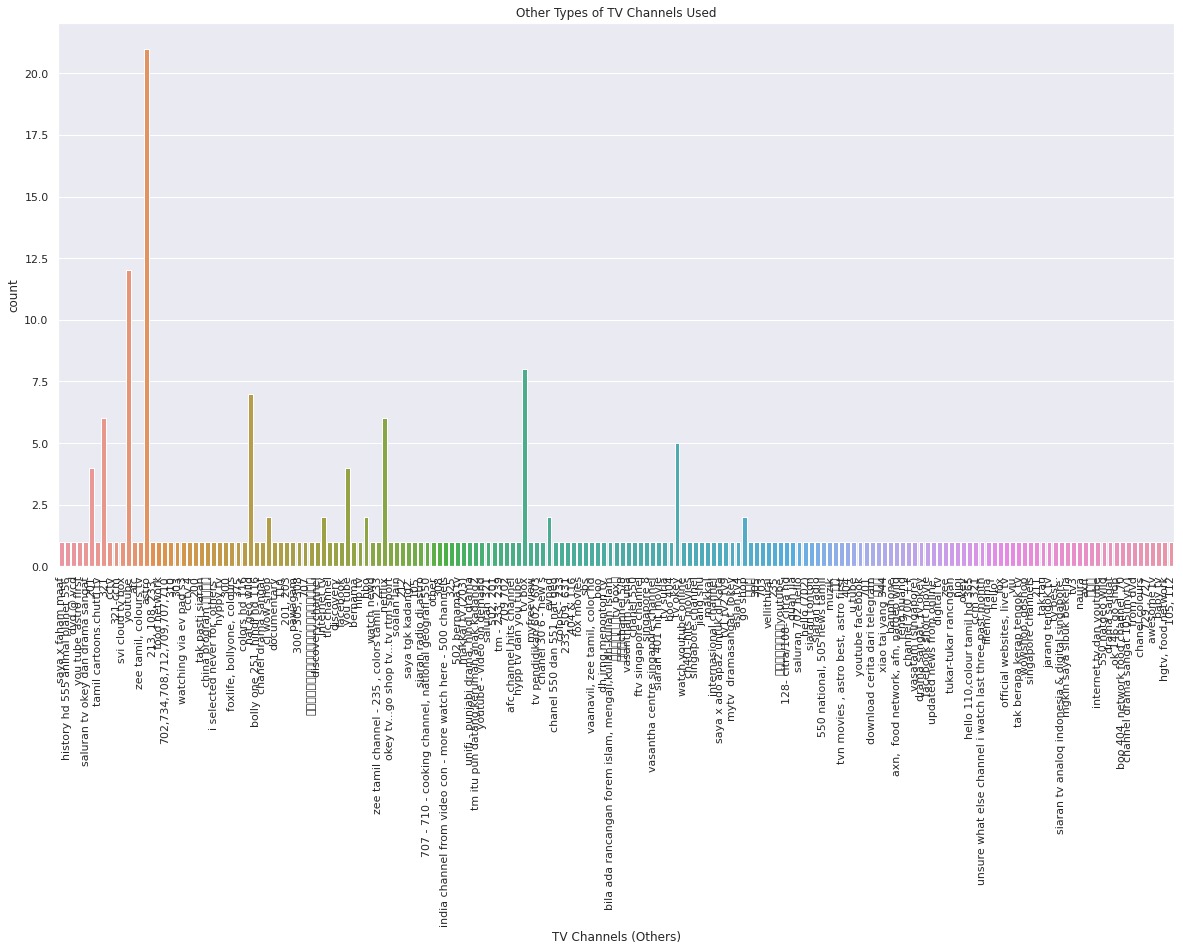

In [126]:
other_channels = survey_data[['ID', 'v_109']]
other_channels.dropna(inplace=True)
other_channels['v_109'] = other_channels['v_109'].str.lower()

sns.countplot(data=other_channels, x='v_109');
plt.title('Other Types of TV Channels Used')
plt.xlabel('TV Channels (Others)')
plt.xticks(rotation=90);

##**Types of Program (1g: v_110 - v_120)**

In [127]:
programType = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[80:91])

In [128]:
program_types = []

f = open("program_title", "r")
for line in f:
  program_types.append(line.strip())

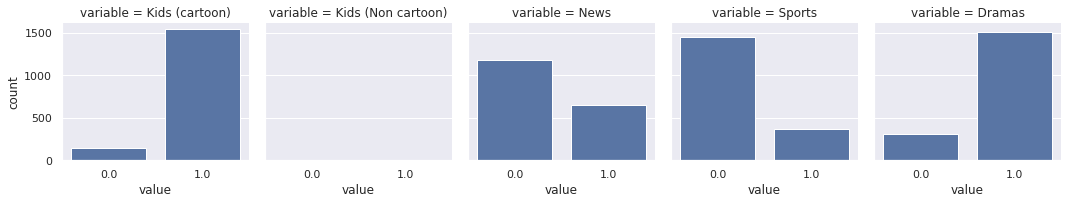

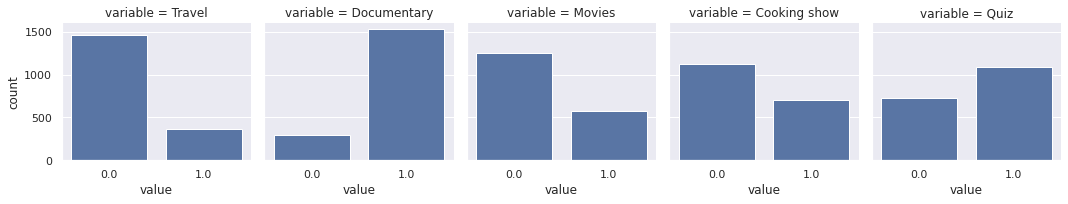

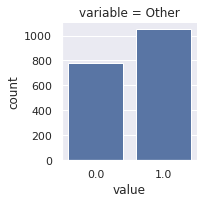

In [129]:
programType.replace(survey_data.columns[80:91], program_types, inplace=True)


counter = 0
min_i = 80
max_i = 91
len_titles = len(program_types)

for i in range(min_i, max_i, 5):
  if i + 5 > max_i:
    cols = survey_data.columns[i:max_i]
    facettitles = program_types[counter: len_titles]
    timeSpentOnChannel = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[i:max_i])
    temp = timeSpentOnChannel.replace(cols, facettitles)
    g = sns.FacetGrid(data=temp, col="variable");
    g.map_dataframe(sns.countplot, x='value');
    break

  cols = survey_data.columns[i:i+5]
  facettitles = program_types[counter: counter + 5]
  counter += 5
  timeSpentOnChannel = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[i:i+5])
  temp = timeSpentOnChannel.replace(cols, facettitles)
  g = sns.FacetGrid(data=temp, col="variable");
  g.map_dataframe(sns.countplot, x='value');

###**We can see that a large proportion of citizens watch Dramas and News on the Television**

##**Misc Questions (1h - 1j: v_121 - v_123)**

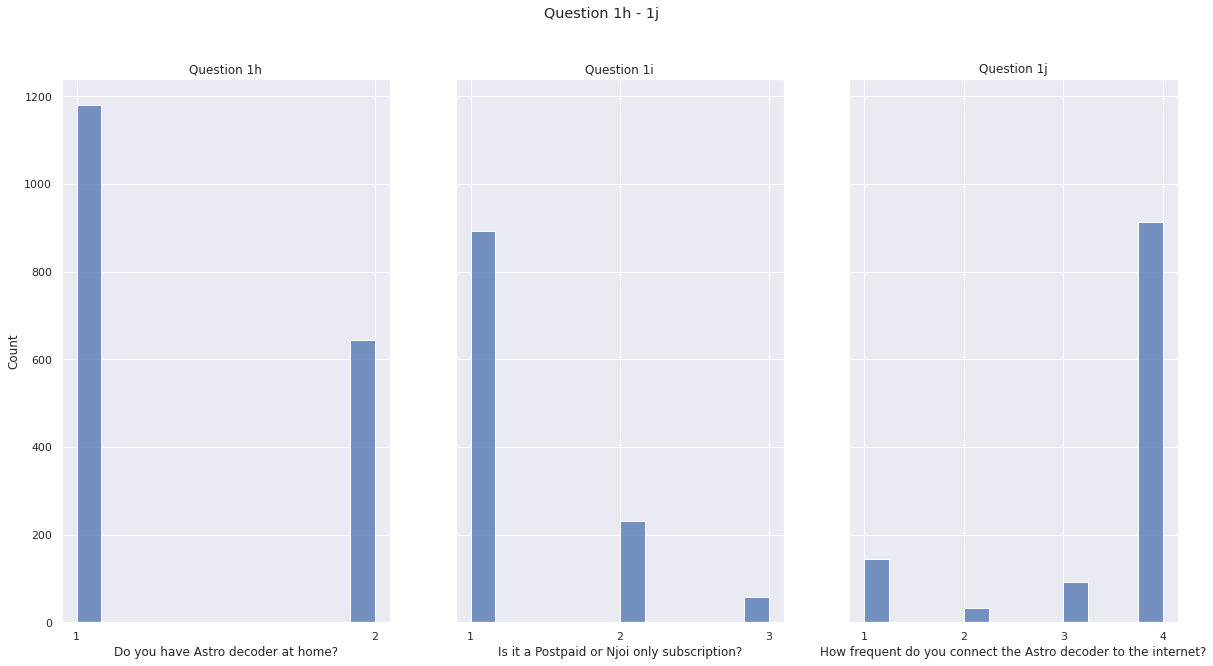

In [130]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Question 1h - 1j')

sns.histplot(ax=ax[0],data = survey_data, x='v_121');
ax[0].set_title('Question 1h')
ax[0].set_xlabel('Do you have Astro decoder at home?')
ax[0].set_xticks([1,2])

sns.histplot(ax=ax[1], data=survey_data, x='v_122');
ax[1].set_title('Question 1i')
ax[1].set_xlabel('Is it a Postpaid or Njoi only subscription?')
ax[1].set_xticks([1,2,3])

sns.histplot(ax=ax[2], data=survey_data, x='v_123');
ax[2].set_title('Question 1j')
ax[2].set_xlabel('How frequent do you connect the Astro decoder to the internet?')
ax[2].set_xticks([1,2,3,4])

plt.show()

###**We can see that:**
1. Majority of peoply have an Astro Decoder at Home
2. Mostly Postpaid subscription
3. Vast majority do not connect the Astro Decoder to the Internet

##**Internet Options (1k: v_124 - v_125)**

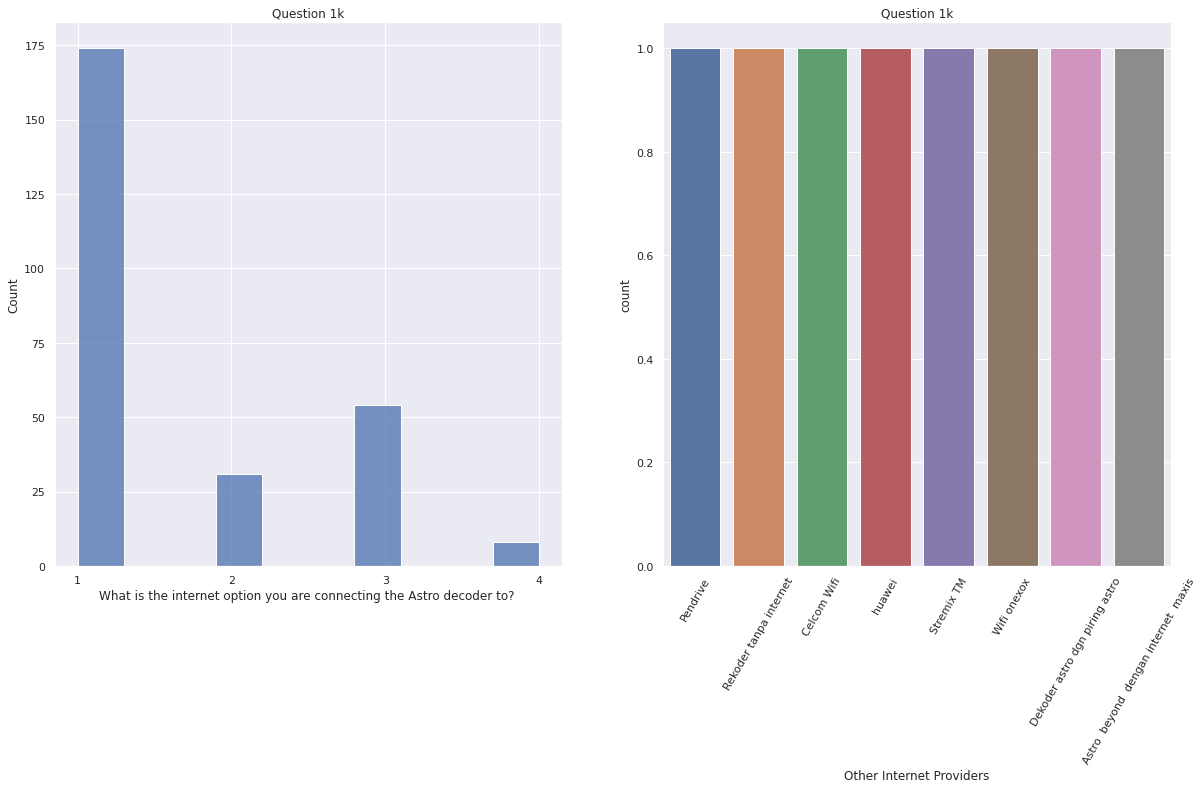

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(ax=ax[0],data = survey_data, x='v_124');
ax[0].set_title('Question 1k')
ax[0].set_xlabel('What is the internet option you are connecting the Astro decoder to? ')
ax[0].set_xticks([1,2,3,4])

otherInternet = survey_data[['ID','v_125']].dropna()

sns.countplot(ax=ax[1], data=otherInternet, x='v_125');
ax[1].set_title('Question 1k')
ax[1].set_xlabel('Other Internet Providers')
plt.xticks(rotation=60);

###**Most connect the decoder to an internet modem**

##**Usage of Astro Go (1m: v_127 - v_134)**

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(ax=ax[0],data = survey_data, x='v_127');
ax[0].set_title('Question 1m')
ax[0].set_xlabel('Does anyone in your household use Astro Go? Astro Go allows you to watch Astro programs\n via the internet on a range of devices (i.e. PC, smartphone, tablet, etc.) in or out of home.')
ax[0].set_xticks([1,2])

astrogoPlatforms = survey_data.melt(id_vars=['ID'], value_vars=survey_data.columns[98:102])
astrogoPlatforms.replace(survey_data.columns[98:102], ['PC/Laptop','Smartphone','Tablet Computer', 'Others'], inplace=True)
astrogoPlatforms.dropna(inplace=True)
astrogoPlatforms.drop(columns=['ID'], inplace=True)

astrogoPlatforms.groupby(['variable']).sum().unstack().plot(kind='bar', ax=ax[1]);
ax[1].set_title('Question 1m')
ax[1].set_xlabel('Platforms using Astro Go')
ax[1].set_xticklabels(['Others', 'PC/Laptop','Smartphone','Tablet Computer'])
plt.xticks(rotation=60);

##**Number of TVs in Household (1n: v_135 - v_136)**

In [133]:
sns.countplot(data = survey_data, x='v_135');
plt.title('Question 1n')
plt.xlabel('How many TVs do you have in the household that you or any other family members have used at least once in the past 1 year?')
plt.xticks([1,2,3,4])
plt.show()

In [134]:
otherCountTV = survey_data[['ID','v_136']].dropna()
otherCountTV

ID                      v_136
268   174188101                          4
341   202268101                      Ceria
388   206013101  I don't have a TV at home
620   247111101                      Astro
628   247192101              2 galaxy tabs
1078  800175801                          5
1190  800469901            NTV 7, 8TV ,TV9
1204  800583401                       Njoi
1290  801045501                          4
1592  801853701                         28
1739  802032301          Every room has tv

###**We can see that most households only have 1 TV in their house. Those under the 'Others' section make up a very small percentage, we can choose to ignore them**